In [1]:
import pandas as pd
import numpy as np
import csv
import copy
from collections import defaultdict

In [2]:
#Import all the data

#Households data
houses = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_2010_2012/caltrans_full_survey/survey_person.csv', encoding = "ISO-8859-1")

#Trips data
obd_trips = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_2010_2012/caltrans_full_survey/obd_gpstrips.csv', encoding = "ISO-8859-1")
vgps_trips = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_2010_2012/caltrans_full_survey/v_gpstrips.csv', encoding = "ISO-8859-1")
wgps_trips = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_2010_2012/caltrans_full_survey/w_gpstrips.csv', encoding = "ISO-8859-1")

/Users/david/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9,46,50,51,102,105,120) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
hhs = houses[['sampno', 'empl_industry']]
hhs


,sampno,empl_industry
0,7128119,54.0
1,7128119,NaN
2,7128138,61.0
3,7128262,NaN
4,7128262,98.0
5,7128262,NaN
6,7128288,NaN
7,7128288,NaN
8,7128316,61.0
9,7128372,NaN


In [5]:
hhs = hhs.dropna()
hhs

,sampno,empl_industry
0,7128119,54.0
2,7128138,61.0
4,7128262,98.0
8,7128316,61.0
10,7128401,61.0
12,7128401,54.0
16,7128439,54.0
17,7128452,62.0
21,7128552,54.0
24,7128628,48.0


In [6]:
#make a list of households

hhs_sampleno = hhs["sampno"]

list_houses = set([]) #so no duplicates
for s in hhs_sampleno:
    list_houses.add(s)
    
list_houses

{2621444,
 7208971,
 2621453,
 2621464,
 7208989,
 7208991,
 1966111,
 3014694,
 1179689,
 2490410,
 1835052,
 2490412,
 3014702,
 2228277,
 7077943,
 1835066,
 7077954,
 1835084,
 1441871,
 2490449,
 2490453,
 1704022,
 3014746,
 1835101,
 2097246,
 3014752,
 1835107,
 1441893,
 2490472,
 2621544,
 7209067,
 2490476,
 1704062,
 1835135,
 1048704,
 1441922,
 7209091,
 3014786,
 2490503,
 2883720,
 3014793,
 1966220,
 2490508,
 1048730,
 1835163,
 2490525,
 1704095,
 1048736,
 7209132,
 1835193,
 1835198,
 1835204,
 1704136,
 2621640,
 2490570,
 2883796,
 2490585,
 3014875,
 1835229,
 1835230,
 1310943,
 2883810,
 2228452,
 1179881,
 1966315,
 2883820,
 1442032,
 1835255,
 1835262,
 1966335,
 2752777,
 7209228,
 1835282,
 3014931,
 1048852,
 7209242,
 1704221,
 2621727,
 1704224,
 1704229,
 1835314,
 1442103,
 2752831,
 2752832,
 1442113,
 2883914,
 2883922,
 3014996,
 2228569,
 2490714,
 2752864,
 2752866,
 3015029,
 1835395,
 2621831,
 2621834,
 1835410,
 1966489,
 2490779,
 3015069,


In [7]:
#Get all the trips into one Series
vgps = vgps_trips['sampno']
obd = obd_trips['sampno']
wgps = wgps_trips['sampno']

#Check the size of the Series
print(vgps.size + obd.size+ wgps.size)

204633


In [8]:
series1 = vgps.append(obd)
series1.size


83034

In [9]:
series2 = series1.append(wgps)
series2.size

#series2 matches the size of the Series so Good to go

204633

In [10]:
#check size of series is the accurate
series = series2.copy(deep = True)
series

0         1776019
1         2759536
2         2055542
3         2556033
4         2759536
5         2577440
6         1318928
7         2959995
8         1120935
9         3052193
10        7204239
11        2118071
12        1121105
13        2645047
14        1729827
15        2951975
16        1035198
17        2195580
18        2264740
19        2759536
20        2525166
21        1051649
22        7203374
23        2217304
24        1402529
25        1123111
26        1264399
27        1044414
28        1186814
29        1712705
           ...   
121569    1125257
121570    1059276
121571    1059276
121572    1059276
121573    1059276
121574    1059276
121575    1059276
121576    1059276
121577    1125257
121578    1059276
121579    1125257
121580    1052905
121581    1052905
121582    1043613
121583    1043613
121584    1043613
121585    1043613
121586    1052905
121587    1134890
121588    1125257
121589    1125309
121590    1048852
121591    1048852
121592    1048852
121593    

In [11]:
#make a dictionary with sampno mapped to residence type
mapping = {}

for row in hhs.values:
    s_num = int(row[0])
    empl_ind = row[1]
    mapping[s_num] = empl_ind

print(mapping)

{7128119: 54.0, 7128138: 61.0, 7128262: 98.0, 7128316: 61.0, 7128401: 54.0, 7128439: 54.0, 7128452: 62.0, 7128552: 54.0, 7128628: 44.0, 7128670: 61.0, 7128725: 44.0, 7128782: 31.0, 7128864: 61.0, 7128983: 42.0, 7129034: 53.0, 7129040: 48.0, 7129072: 61.0, 7129077: 31.0, 7129190: 51.0, 7129215: 44.0, 7129361: 62.0, 7129450: 62.0, 7129476: 31.0, 7129493: 22.0, 7129568: 97.0, 7129610: 44.0, 7129640: 54.0, 7129704: 23.0, 7129727: 31.0, 7129973: 44.0, 7130048: 44.0, 7130049: 81.0, 7130099: 56.0, 7130112: 51.0, 7130166: 54.0, 7130169: 61.0, 7130185: 11.0, 7130309: 44.0, 7130312: 22.0, 7130325: 55.0, 7130327: 44.0, 7130371: 92.0, 7130422: 48.0, 7130460: 61.0, 7130467: 92.0, 7130477: 92.0, 7130625: 62.0, 7130706: 61.0, 7130708: 52.0, 7130710: 61.0, 7131089: 23.0, 7131095: 48.0, 7131219: 98.0, 7131231: 44.0, 7131243: 81.0, 7131405: 99.0, 7131477: 72.0, 7131518: 71.0, 7131561: 23.0, 7131580: 22.0, 7131634: 52.0, 7131653: 22.0, 7131662: 23.0, 7131674: 23.0, 7134650: 44.0, 7131698: 51.0, 7131699: 

In [12]:
counts = defaultdict(int)

#now iterate through data
for trip in series:
    
    if trip not in list_houses:
        pass
    else:
        add_on = mapping[trip]
       # print(add_on)
        counts[add_on] += 1

In [13]:
counts

defaultdict(int,
            {62.0: 22880,
             61.0: 27941,
             99.0: 1843,
             23.0: 7455,
             55.0: 2067,
             72.0: 5174,
             22.0: 3827,
             92.0: 15641,
             31.0: 10302,
             71.0: 5936,
             54.0: 23702,
             42.0: 1247,
             48.0: 5319,
             52.0: 7860,
             51.0: 14177,
             44.0: 13375,
             11.0: 2139,
             56.0: 2765,
             81.0: 8153,
             53.0: 3717,
             97.0: 1880,
             98.0: 1333,
             21.0: 562})

In [15]:
#turn a dictionary into a dataframe
count_df = pd.DataFrame(list(counts.items()), columns=['employment_industry', 'count'])
count_df

,employment_industry,count
0,62.0,22880
1,61.0,27941
2,99.0,1843
3,23.0,7455
4,55.0,2067
5,72.0,5174
6,22.0,3827
7,92.0,15641
8,31.0,10302
9,71.0,5936


In [17]:
Y = count_df.sort_values("count").groupby("employment_industry", as_index=False).first()
Y

,employment_industry,count
0,11.0,2139
1,21.0,562
2,22.0,3827
3,23.0,7455
4,31.0,10302
5,42.0,1247
6,44.0,13375
7,48.0,5319
8,51.0,14177
9,52.0,7860


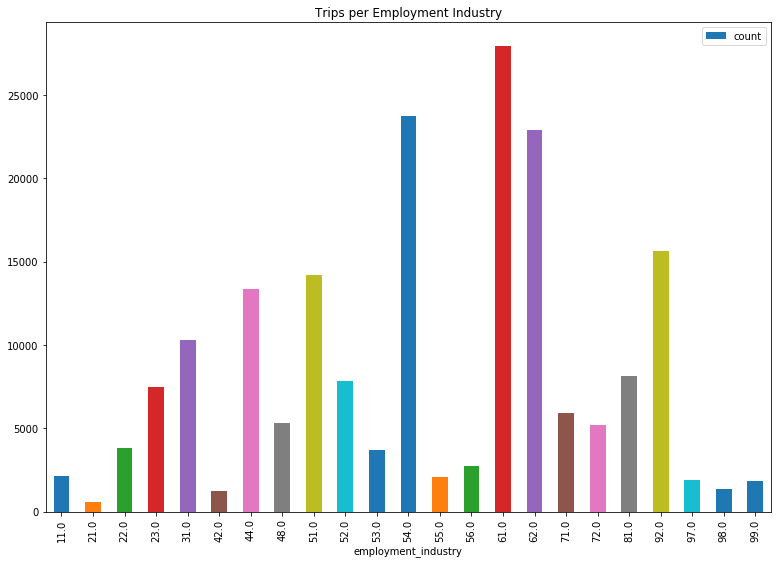

In [21]:
Y.plot(x='employment_industry', y='count',kind='bar', figsize=(13,9), title="Trips per Employment Industry")